# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings


In [2]:
# Import the libraries you will be using for analysis

import pandas as pd          
import numpy as np           
import seaborn as sns         
sns.set()                         
import matplotlib.pyplot as plt  
%matplotlib inline            
import datetime as dt

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
file_path = r"C:\Users\USER\OneDrive\Desktop\AI_course\Datasets and Dictionary\trip_records\2023-1.parquet"
df = pd.read_parquet(file_path)
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [21]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload


import pandas as pd
import os
import math

folder_path = r"C:\Users\USER\OneDrive\Desktop\AI_course\Datasets and Dictionary\trip_records"


files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]
print(f"Found {len(files)} parquet files.")


total_sample_size = 275000


sample_per_file = math.ceil(total_sample_size / len(files))

print(f"Sampling approximately {sample_per_file} rows from each file.")

def sample_file(file_path, nrows):
    df = pd.read_parquet(file_path)
    if len(df) > nrows:
        sampled_df = df.sample(n=nrows, random_state=42)
    else:
        sampled_df = df  
    return sampled_df

sampled_dfs = []

for file in files:
    full_path = os.path.join(folder_path, file)
    sampled_df = sample_file(full_path, sample_per_file)
    sampled_dfs.append(sampled_df)

# Combine all samples
combined_sample = pd.concat(sampled_dfs, ignore_index=True)
print(f"Combined sample shape: {combined_sample.shape}")
df= combined_sample 



Found 13 parquet files.
Sampling approximately 21154 rows from each file.
Combined sample shape: (275002, 20)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

SyntaxError: invalid syntax (1362553251.py, line 42)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file



In [23]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,1,2023-01-05 07:50:08,2023-01-05 08:02:04,2.0,1.90,1.0,N,239,236,1,13.5,2.5,0.5,2.50,0.0,1.0,20.00,2.5,0.0,NaN
1,2,2023-01-17 07:47:24,2023-01-17 08:00:50,5.0,1.86,1.0,N,239,162,1,14.2,0.0,0.5,3.64,0.0,1.0,21.84,2.5,0.0,NaN
2,2,2023-01-25 21:57:59,2023-01-25 22:00:33,1.0,0.50,1.0,N,162,170,1,5.1,1.0,0.5,2.02,0.0,1.0,12.12,2.5,0.0,NaN
3,2,2023-01-09 19:36:54,2023-01-09 19:52:01,2.0,2.56,1.0,N,162,262,1,17.0,2.5,0.5,4.70,0.0,1.0,28.20,2.5,0.0,NaN
4,1,2023-01-11 22:19:13,2023-01-11 22:32:37,1.0,2.80,1.0,N,164,231,1,14.9,3.5,0.5,3.98,0.0,1.0,23.88,2.5,0.0,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275002 entries, 0 to 275001
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               275002 non-null  int64         
 1   tpep_pickup_datetime   275002 non-null  datetime64[us]
 2   tpep_dropoff_datetime  275002 non-null  datetime64[us]
 3   passenger_count        265651 non-null  float64       
 4   trip_distance          275002 non-null  float64       
 5   RatecodeID             265651 non-null  float64       
 6   store_and_fwd_flag     265651 non-null  object        
 7   PULocationID           275002 non-null  int64         
 8   DOLocationID           275002 non-null  int64         
 9   payment_type           275002 non-null  int64         
 10  fare_amount            275002 non-null  float64       
 11  extra                  275002 non-null  float64       
 12  mta_tax                275002 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [24]:
# Fix the index and drop any columns that are not needed
columns_to_drop = ['store_and_fwd_flag', 'mta_tax', 'improvement_surcharge']
df = df.drop(columns=columns_to_drop)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [25]:
# Combine the two airport fee columns

df['airport_fee'] = df['airport_fee'].fillna(0) + df['Airport_fee'].fillna(0)


df = df.drop(columns=['Airport_fee'])


print(df[['airport_fee']].info())
print(df[['airport_fee']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275002 entries, 0 to 275001
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   airport_fee  275002 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB
None
   airport_fee
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [28]:
# check where values of fare amount are negative

monetary_cols = [
    'fare_amount',
    'extra',
    'tip_amount',
    'tolls_amount',
    'total_amount',
    'congestion_surcharge',
    'airport_fee'
]
df = df[(df[monetary_cols] >= 0).all(axis=1)]

Did you notice something different in the `RatecodeID` column for above records?

In [29]:
# Analyse RatecodeID for the negative fare amounts
df['negative_fare'] = df['fare_amount'] < 0
negative_fare_df = df[df['negative_fare'] == True]

# Show counts of RatecodeID for negative fares
ratecode_counts = negative_fare_df['RatecodeID'].value_counts()

print(ratecode_counts)


Series([], Name: count, dtype: int64)


In [30]:
# Find which columns have negative values
df['negative_fare'] = df['fare_amount'] < 0

In [31]:
# fix these negative values

num_negative_fares = (df['fare_amount'] < 0).sum()
print(f"Number of rows with negative fare_amount: {num_negative_fares}")

Number of rows with negative fare_amount: 0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [32]:
# Find the proportion of missing values in each column
missing_proportion = df.isna().mean()
print(missing_proportion)


VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
tip_amount               0.0
tolls_amount             0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
negative_fare            0.0
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [33]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
rows_with_nulls = df[df.isnull().any(axis=1)]
print(rows_with_nulls)


median_passenger_count = df['passenger_count'].median()
df['passenger_count'] = df['passenger_count'].fillna(median_passenger_count)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, tip_amount, tolls_amount, total_amount, congestion_surcharge, airport_fee, negative_fare]
Index: []


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [35]:
# Fix missing values in 'RatecodeID'
mode_ratecode = df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(1)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge


df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)
mean_congestion = df['congestion_surcharge'].mean()
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(mean_congestion)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values



### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [38]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

print(df.describe(include='all'))

             VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count   265637.000000                      265637                      265637   
unique            NaN                         NaN                         NaN   
top               NaN                         NaN                         NaN   
freq              NaN                         NaN                         NaN   
mean         1.741199  2023-06-30 16:44:23.161709  2023-06-30 17:01:44.424233   
min          1.000000         2023-01-01 00:02:59         2023-01-01 00:08:01   
25%          1.000000         2023-03-31 10:18:13         2023-03-31 10:31:55   
50%          2.000000         2023-06-29 16:37:20         2023-06-29 17:01:49   
75%          2.000000         2023-09-30 09:50:24         2023-09-30 09:59:20   
max          2.000000         2023-12-31 23:51:30         2023-12-31 23:58:15   
std          0.437977                         NaN                         NaN   

        passenger_count  tr

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [39]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [40]:
# Continue with outlier handling

df = df[df['trip_distance'] <= 100]

In [41]:
# Do any columns need standardising?

df = df[(df['trip_distance'] > 0) & (df['trip_distance'] <= 100)]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [42]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'negative_fare']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [43]:
# Find and show the hourly trends in taxi pickups

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek  
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

C:\Users\USER\AppData\Local\Temp\ipykernel_125504\2451352558.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_hour', data=df, palette='viridis')
C:\Users\USER\AppData\Local\Temp\ipykernel_125504\2451352558.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_dayofweek', data=df, palette='magma')
C:\Users\USER\AppData\Local\Temp\ipykernel_125504\2451352558.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_month', data=df, palette='coolwarm')


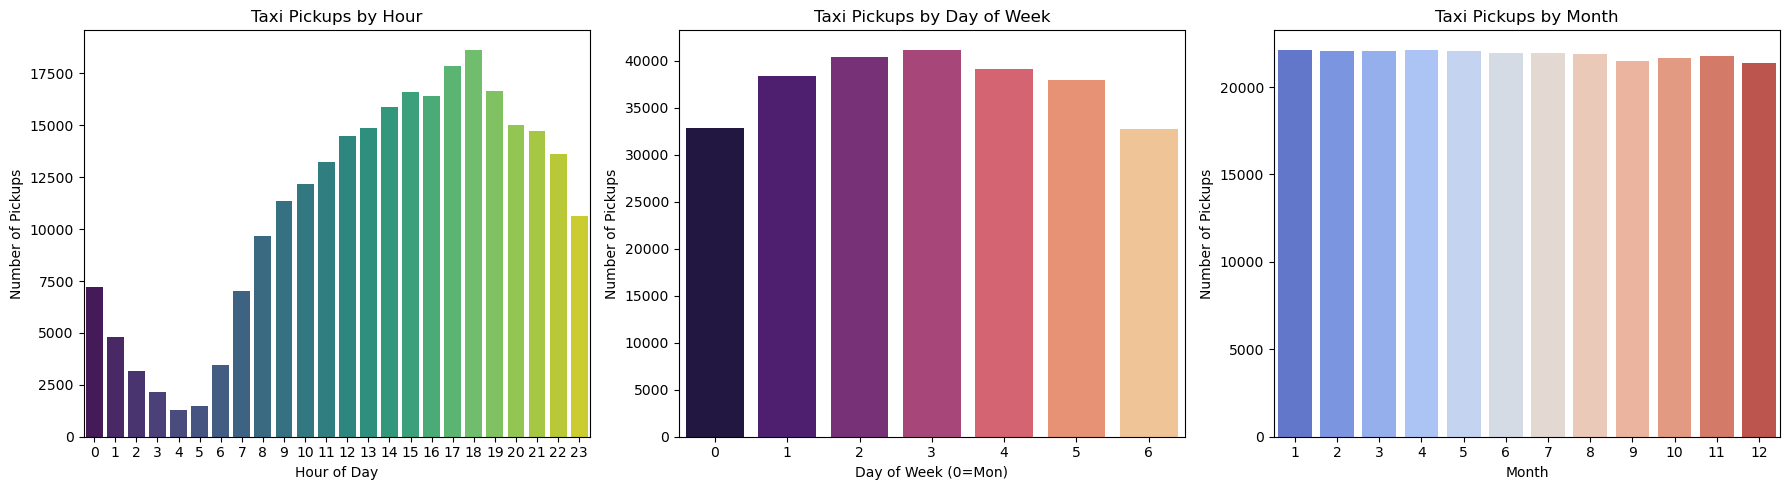

In [45]:
# Find and show the daily trends in taxi pickups (days of the week)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,5))

# Distribution by hour
plt.subplot(1, 3, 1)
sns.countplot(x='pickup_hour', data=df, palette='viridis')
plt.title('Taxi Pickups by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')

# Distribution by day of week
plt.subplot(1, 3, 2)
sns.countplot(x='pickup_dayofweek', data=df, palette='magma')
plt.title('Taxi Pickups by Day of Week')
plt.xlabel('Day of Week (0=Mon)')
plt.ylabel('Number of Pickups')

# Distribution by month
plt.subplot(1, 3, 3)
sns.countplot(x='pickup_month', data=df, palette='coolwarm')
plt.title('Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')

plt.tight_layout()
plt.show()


In [ ]:
# Show the monthly trends in pickups



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [47]:
# Analyse the above parameters

cols_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in cols_to_check:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"Column '{col}':")
    print(f"  Zero values count: {zero_count}")
    print(f"  Negative values count: {negative_count}\n")


Column 'fare_amount':
  Zero values count: 24
  Negative values count: 0

Column 'tip_amount':
  Zero values count: 57473
  Negative values count: 0

Column 'total_amount':
  Zero values count: 10
  Negative values count: 0

Column 'trip_distance':
  Zero values count: 0
  Negative values count: 0



Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [48]:
# Create a df with non zero entries for the selected parameters.

cols_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

filtered_df = df[(df[cols_to_check] > 0).all(axis=1)]

print(f"Filtered dataframe shape: {filtered_df.shape}")

Filtered dataframe shape: (204977, 20)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [50]:
cols_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

df_new = df[(df[cols_to_check] > 0).all(axis=1)]

print(f"df_new shape: {df_new.shape}")

df_new shape: (204977, 20)


C:\Users\USER\AppData\Local\Temp\ipykernel_125504\1492987187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['tpep_pickup_datetime'] = pd.to_datetime(df_new['tpep_pickup_datetime'])
C:\Users\USER\AppData\Local\Temp\ipykernel_125504\1492987187.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['pickup_month'] = df_new['tpep_pickup_datetime'].dt.month


    pickup_month  fare_amount  tip_amount  total_amount month_name
0              1    319895.72    75826.62     491487.87    January
1              2    315064.01    74788.92     485554.50   February
2              3    321525.25    77042.25     494772.46      March
3              4    327811.85    77936.45     501672.22      April
4              5    342550.80    81038.86     522488.20        May
5              6    338799.26    80175.79     517148.87       June
6              7    328701.27    77278.24     499280.95       July
7              8    325497.14    76589.13     496873.84     August
8              9    338895.30    79786.90     514740.99  September
9             10    344628.75    81678.41     525273.61    October
10            11    342682.39    81740.69     523195.83   November
11            12    324060.15    77625.46     495315.59   December


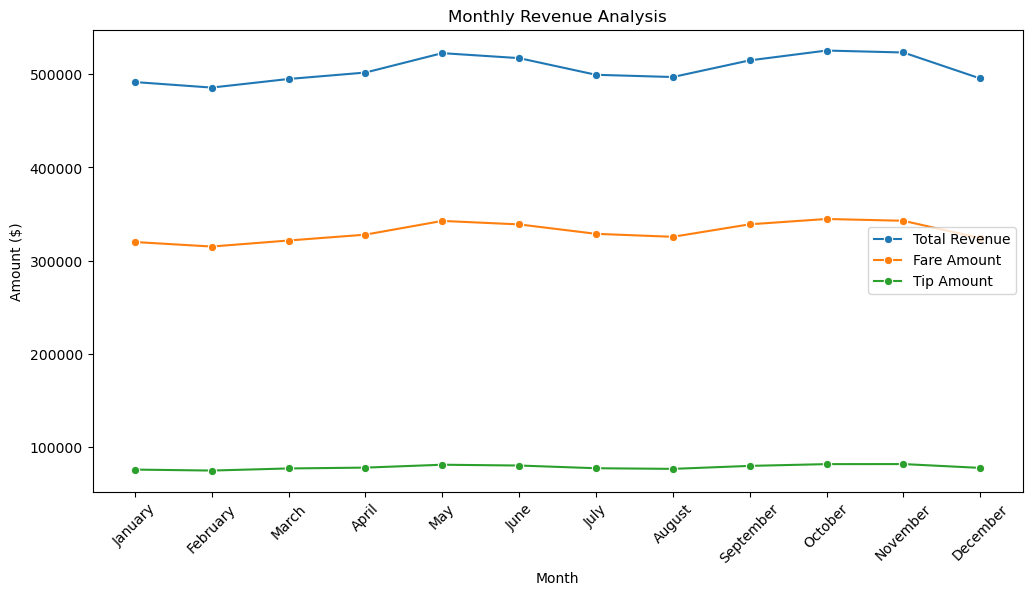

In [51]:
# Group data by month and analyse monthly revenue

df_new['tpep_pickup_datetime'] = pd.to_datetime(df_new['tpep_pickup_datetime'])


df_new['pickup_month'] = df_new['tpep_pickup_datetime'].dt.month

# Group by month and sum the revenue-related columns
monthly_revenue = df_new.groupby('pickup_month')[['fare_amount', 'tip_amount', 'total_amount']].sum().reset_index()

# Optional: map month numbers to names for readability
import calendar
monthly_revenue['month_name'] = monthly_revenue['pickup_month'].apply(lambda x: calendar.month_name[x])

# Sort by month
monthly_revenue = monthly_revenue.sort_values('pickup_month')

print(monthly_revenue)

# You can also visualize it
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_revenue, x='month_name', y='total_amount', marker='o', label='Total Revenue')
sns.lineplot(data=monthly_revenue, x='month_name', y='fare_amount', marker='o', label='Fare Amount')
sns.lineplot(data=monthly_revenue, x='month_name', y='tip_amount', marker='o', label='Tip Amount')
plt.title('Monthly Revenue Analysis')
plt.ylabel('Amount ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend()
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [52]:
# Calculate proportion of each quarter

df_new['tpep_pickup_datetime'] = pd.to_datetime(df_new['tpep_pickup_datetime'])


df_new['pickup_quarter'] = df_new['tpep_pickup_datetime'].dt.to_period('Q')


quarterly_revenue = df_new.groupby('pickup_quarter')['total_amount'].sum().reset_index()


total_revenue = quarterly_revenue['total_amount'].sum()


quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue

print(quarterly_revenue)


  pickup_quarter  total_amount  proportion
0         2023Q1    1471814.83    0.242561
1         2023Q2    1541309.29    0.254014
2         2023Q3    1510895.78    0.249002
3         2023Q4    1543785.03    0.254422


C:\Users\USER\AppData\Local\Temp\ipykernel_125504\3435063499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['tpep_pickup_datetime'] = pd.to_datetime(df_new['tpep_pickup_datetime'])
C:\Users\USER\AppData\Local\Temp\ipykernel_125504\3435063499.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['pickup_quarter'] = df_new['tpep_pickup_datetime'].dt.to_period('Q')


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

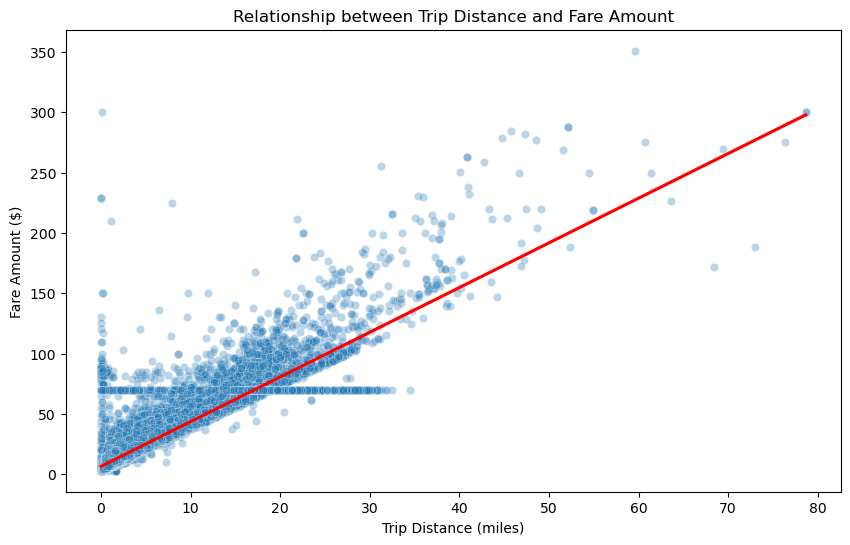

Correlation between trip_distance and fare_amount: 0.951


In [53]:
# Show how trip fare is affected by distance
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_new, alpha=0.3)
sns.regplot(x='trip_distance', y='fare_amount', data=df_new, scatter=False, color='red')
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()


correlation = df_new[['trip_distance', 'fare_amount']].corr().loc['trip_distance', 'fare_amount']
print(f'Correlation between trip_distance and fare_amount: {correlation:.3f}')



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

C:\Users\USER\AppData\Local\Temp\ipykernel_125504\3278690164.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['trip_duration_minutes'] = (df_new['tpep_dropoff_datetime'] - df_new['tpep_pickup_datetime']).dt.total_seconds() / 60


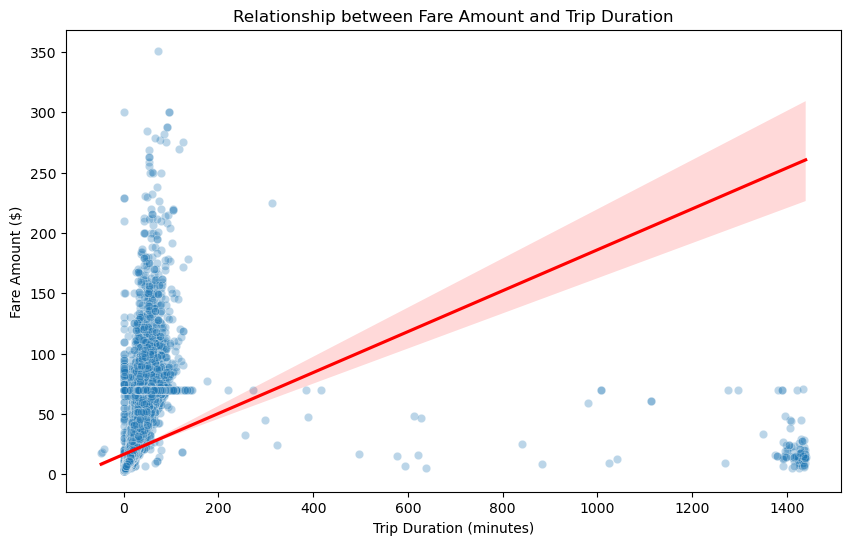

Correlation between trip duration and fare amount: 0.329


In [54]:
# Show relationship between fare and trip duration


df_new['trip_duration_minutes'] = (df_new['tpep_dropoff_datetime'] - df_new['tpep_pickup_datetime']).dt.total_seconds() / 60


plt.figure(figsize=(10,6))
sns.scatterplot(x='trip_duration_minutes', y='fare_amount', data=df_new, alpha=0.3)
sns.regplot(x='trip_duration_minutes', y='fare_amount', data=df_new, scatter=False, color='red')
plt.title('Relationship between Fare Amount and Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.show()


corr_duration_fare = df_new[['trip_duration_minutes', 'fare_amount']].corr().loc['trip_duration_minutes', 'fare_amount']
print(f'Correlation between trip duration and fare amount: {corr_duration_fare:.3f}')


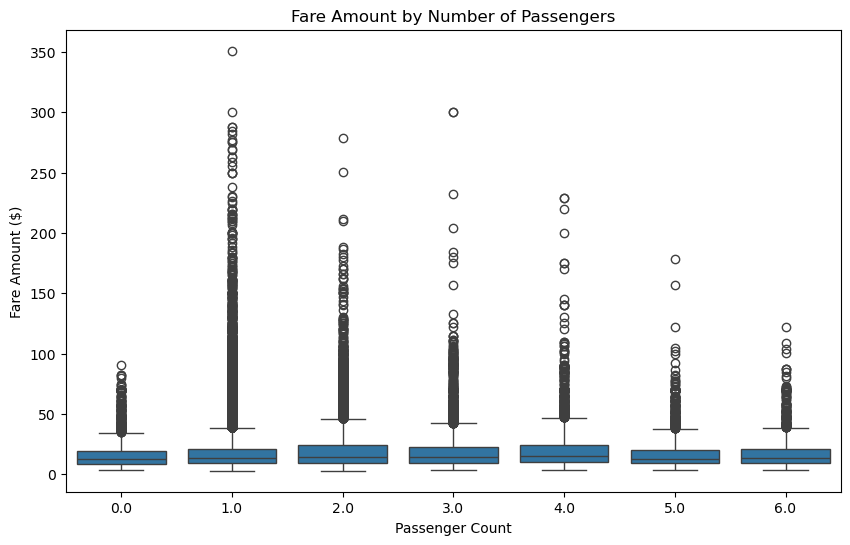

Correlation between passenger count and fare amount: 0.037


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df_new)
plt.title('Fare Amount by Number of Passengers')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()


corr_passenger_fare = df_new[['passenger_count', 'fare_amount']].corr().loc['passenger_count', 'fare_amount']
print(f'Correlation between passenger count and fare amount: {corr_passenger_fare:.3f}')



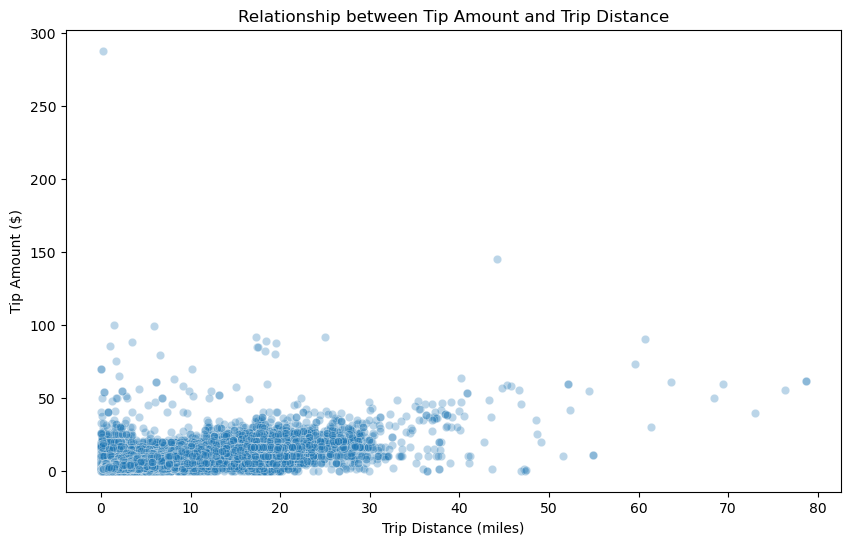

Correlation between trip distance and tip amount: 0.798


In [56]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10,6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df_new, alpha=0.3)
plt.title('Relationship between Tip Amount and Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()


corr_tip_distance = df_new[['trip_distance', 'tip_amount']].corr().loc['trip_distance', 'tip_amount']
print(f'Correlation between trip distance and tip amount: {corr_tip_distance:.3f}')

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

C:\Users\USER\AppData\Local\Temp\ipykernel_125504\2055292504.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['payment_type_desc'] = df_new['payment_type'].map(payment_mapping)
C:\Users\USER\AppData\Local\Temp\ipykernel_125504\2055292504.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_type_desc', data=df_new, order=df_new['payment_type_desc'].value_counts().index, palette='Set2')


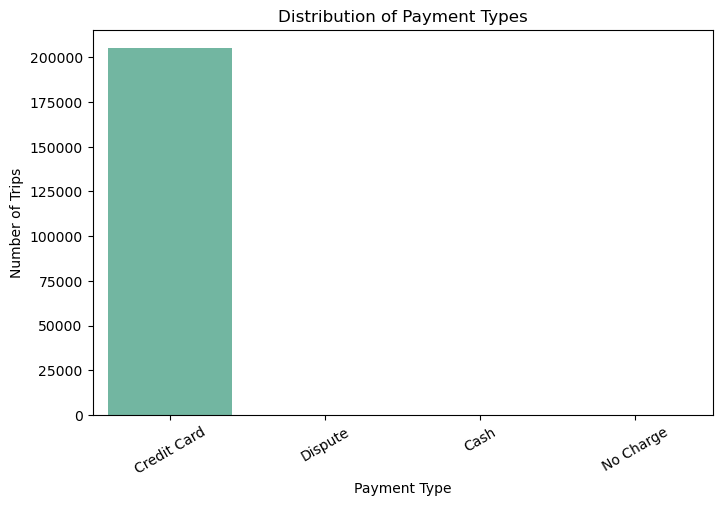

In [58]:

payment_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

df_new['payment_type_desc'] = df_new['payment_type'].map(payment_mapping)

# Plot distribution
plt.figure(figsize=(8,5))
sns.countplot(x='payment_type_desc', data=df_new, order=df_new['payment_type_desc'].value_counts().index, palette='Set2')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=30)
plt.show()


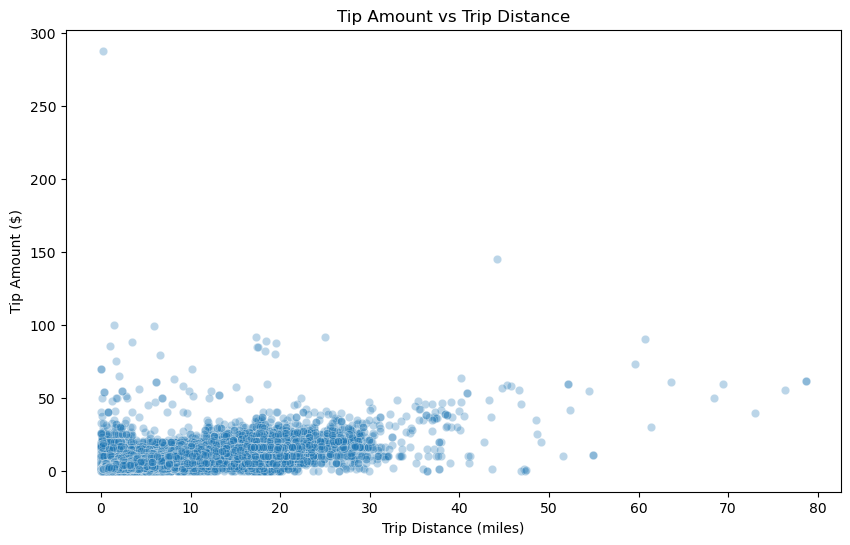

Correlation between tip amount and trip distance: 0.798


In [ ]:




plt.figure(figsize=(10,6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df_new, alpha=0.3)
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()


corr_tip_distance = df_new[['trip_distance', 'tip_amount']].corr().iloc[0, 1]
print(f'Correlation between tip amount and trip distance: {corr_tip_distance:.3f}')



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [59]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [60]:
import geopandas as gpd


shapefile_path = r'C:\Users\USER\OneDrive\Desktop\AI_course\Datasets and Dictionary\taxi_zones\taxi_zones.shp'


zones = gpd.read_file(shapefile_path)


zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [62]:
print(zones.info())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [63]:
# Merge zones and trip records using locationID and PULocationID


zones['LocationID'] = zones['LocationID'].astype(int)


df_merged = df.merge(zones, how='left', left_on='PULocationID', right_on='LocationID')


df_merged.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,pickup_hour,pickup_dayofweek,pickup_month,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,2023-01-05 07:50:08,2023-01-05 08:02:04,2.0,1.90,1.0,239,236,1,13.5,...,7,3,1,239.0,0.063626,0.000205,Upper West Side South,239.0,Manhattan,"POLYGON ((991168.979 226252.992, 991955.565 22..."
1,2,2023-01-17 07:47:24,2023-01-17 08:00:50,5.0,1.86,1.0,239,162,1,14.2,...,7,1,1,239.0,0.063626,0.000205,Upper West Side South,239.0,Manhattan,"POLYGON ((991168.979 226252.992, 991955.565 22..."
2,2,2023-01-25 21:57:59,2023-01-25 22:00:33,1.0,0.50,1.0,162,170,1,5.1,...,21,2,1,162.0,0.035270,0.000048,Midtown East,162.0,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21..."
3,2,2023-01-09 19:36:54,2023-01-09 19:52:01,2.0,2.56,1.0,162,262,1,17.0,...,19,0,1,162.0,0.035270,0.000048,Midtown East,162.0,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21..."
4,1,2023-01-11 22:19:13,2023-01-11 22:32:37,1.0,2.80,1.0,164,231,1,14.9,...,22,2,1,164.0,0.035772,0.000056,Midtown South,164.0,Manhattan,"POLYGON ((988787.425 210315.593, 988662.868 21..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [64]:

trip_counts_by_zone = df_merged.groupby('zone').size().reset_index(name='trip_count')


trip_counts_by_zone = trip_counts_by_zone.sort_values(by='trip_count', ascending=False)


trip_counts_by_zone.head(10)

,zone,trip_count
108,JFK Airport,14089
208,Upper East Side South,12560
138,Midtown Center,12422
207,Upper East Side North,11117
139,Midtown East,9435
162,Penn Station/Madison Sq West,9205
117,LaGuardia Airport,9100
201,Times Sq/Theatre District,8899
121,Lincoln Square East,8689
147,Murray Hill,7743


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [65]:

zones_with_trips = zones.merge(trip_counts_by_zone, how='left', on='zone')


zones_with_trips['trip_count'] = zones_with_trips['trip_count'].fillna(0)


zones_with_trips.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",12.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",0.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",6.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",267.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",3.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

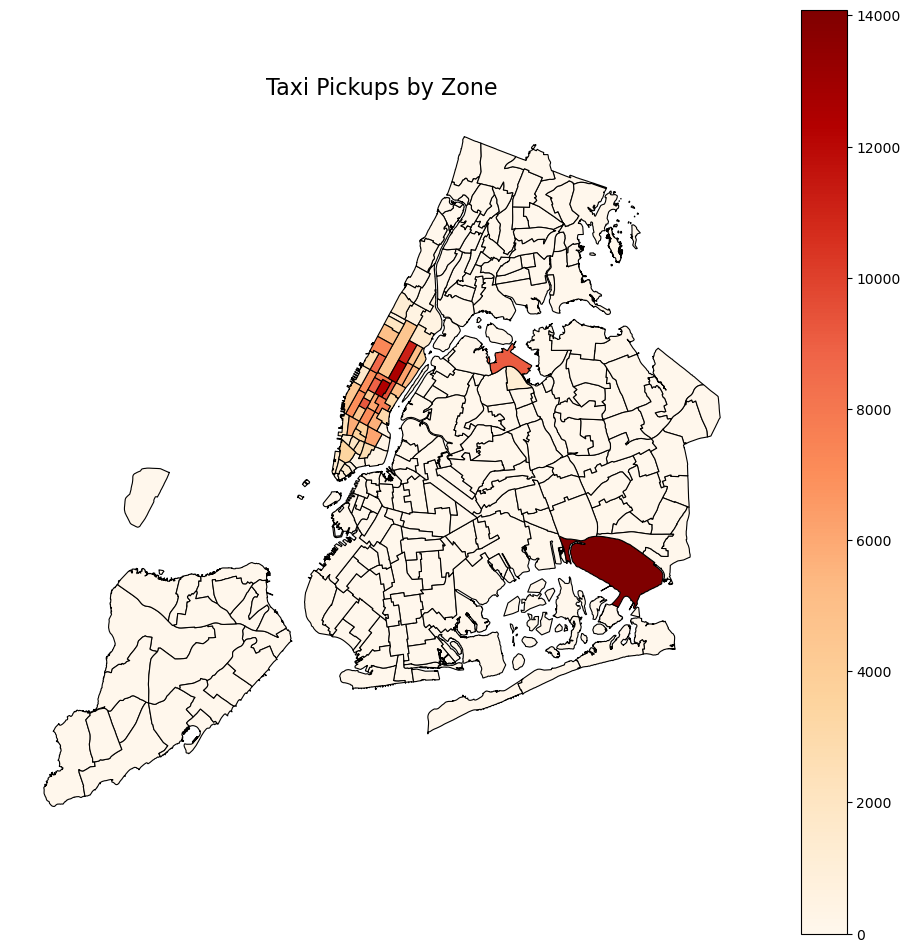

In [66]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 1, figsize=(12, 12))
zones_with_trips.plot(
    column='trip_count',
    cmap='OrRd',          # Orange-Red color map
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    ax=ax
)
plt.title('Taxi Pickups by Zone', fontsize=16)
plt.axis('off')
plt.show()


In [ ]:
# can you try displaying the zones DF sorted by the number of trips?



Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day

df_merged['tpep_pickup_datetime'] = pd.to_datetime(df_merged['tpep_pickup_datetime'])
df_merged['tpep_dropoff_datetime'] = pd.to_datetime(df_merged['tpep_dropoff_datetime'])


df_merged['trip_duration'] = (df_merged['tpep_dropoff_datetime'] - df_merged['tpep_pickup_datetime']).dt.total_seconds()
import numpy as np

df_merged['trip_duration_hours'] = df_merged['trip_duration'] / 3600


df_merged = df_merged[df_merged['trip_duration_hours'] > 0]
df_merged['speed_mph'] = df_merged['trip_distance'] / df_merged['trip_duration_hours']


df_merged['pickup_hour'] = df_merged['tpep_pickup_datetime'].dt.hour


df_merged['route'] = df_merged['PULocationID'].astype(str) + '_' + df_merged['DOLocationID'].astype(str)


speed_summary = df_merged.groupby(['route', 'pickup_hour'])['speed_mph'].mean().reset_index()


slowest_routes_per_hour = speed_summary.groupby('pickup_hour').apply(
    lambda x: x.nsmallest(5, 'speed_mph')
).reset_index(drop=True)

print(slowest_routes_per_hour)


       route  pickup_hour  speed_mph
0    265_265            0   0.060574
1      65_66            0   1.565217
2      36_36            0   1.894737
3     48_177            0   2.265197
4    237_161            0   3.392670
..       ...          ...        ...
115   45_249           23   2.923077
116    70_70           23   3.307913
117    13_13           23   3.346614
118   141_50           23   3.829787
119    97_65           23   3.875135

[120 rows x 3 columns]


C:\Users\USER\AppData\Local\Temp\ipykernel_125504\2518048326.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  slowest_routes_per_hour = speed_summary.groupby('pickup_hour').apply(


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest hour: 18 with 18643 trips


C:\Users\USER\AppData\Local\Temp\ipykernel_125504\2946812010.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_hour', y='trip_count', data=trips_per_hour, palette='viridis')


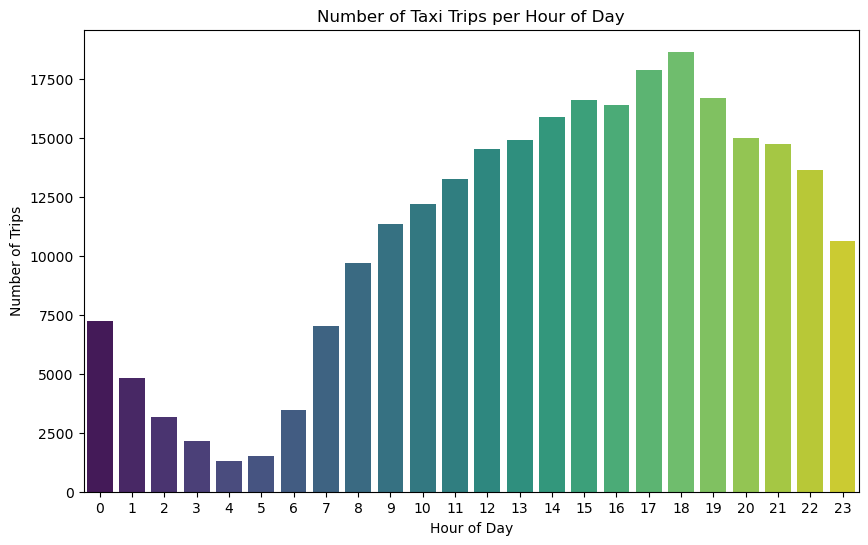

In [69]:
# Visualise the number of trips per hour and find the busiest hour

import matplotlib.pyplot as plt
import seaborn as sns


df_merged['pickup_hour'] = df_merged['tpep_pickup_datetime'].dt.hour


trips_per_hour = df_merged.groupby('pickup_hour').size().reset_index(name='trip_count')


busiest_hour = trips_per_hour.loc[trips_per_hour['trip_count'].idxmax()]

print(f"Busiest hour: {busiest_hour['pickup_hour']} with {busiest_hour['trip_count']} trips")


plt.figure(figsize=(10,6))
sns.barplot(x='pickup_hour', y='trip_count', data=trips_per_hour, palette='viridis')
plt.title('Number of Taxi Trips per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0,24))
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

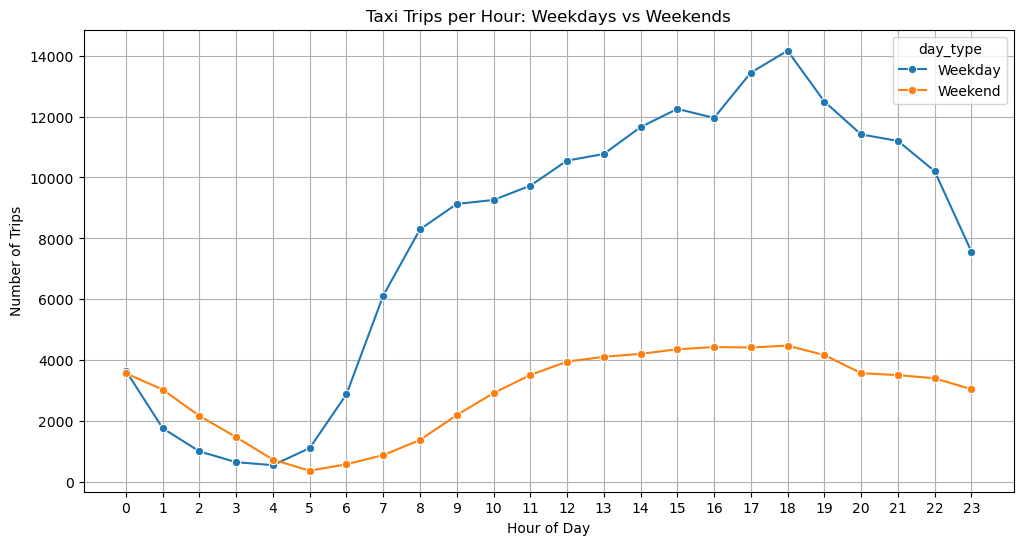

In [70]:
# Compare traffic trends for the week days and weekends

df_merged['day_of_week'] = df_merged['tpep_pickup_datetime'].dt.dayofweek


df_merged['day_type'] = df_merged['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


df_merged['pickup_hour'] = df_merged['tpep_pickup_datetime'].dt.hour

hourly_trips = df_merged.groupby(['day_type', 'pickup_hour']).size().reset_index(name='trip_count')


plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_trips, x='pickup_hour', y='trip_count', hue='day_type', marker='o')
plt.title('Taxi Trips per Hour: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [71]:
# Find top 10 pickup and dropoff zones

top_pickup_zones = df_merged['PULocationID'].value_counts().head(10)
print("Top 10 Pickup Zones:")
print(top_pickup_zones)


top_dropoff_zones = df_merged['DOLocationID'].value_counts().head(10)
print("\nTop 10 Dropoff Zones:")
print(top_dropoff_zones)


Top 10 Pickup Zones:
PULocationID
132    14089
237    12560
161    12422
236    11117
162     9435
186     9205
138     9100
230     8899
142     8689
170     7742
Name: count, dtype: int64

Top 10 Dropoff Zones:
DOLocationID
236    11655
237    11249
161    10420
230     8203
170     7951
162     7389
239     7357
142     7296
141     6965
68      6593
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [72]:
# Find the top 10 and bottom 10 pickup/dropoff ratios


top_pickup_df = top_pickup_zones.reset_index()
top_pickup_df.columns = ['LocationID', 'pickup_count']

top_dropoff_df = top_dropoff_zones.reset_index()
top_dropoff_df.columns = ['LocationID', 'dropoff_count']

# Merge with zones to get zone names
top_pickup_with_names = top_pickup_df.merge(zones[['LocationID', 'zone']], on='LocationID')
top_dropoff_with_names = top_dropoff_df.merge(zones[['LocationID', 'zone']], on='LocationID')

print("Top 10 Pickup Zones with Names:")
print(top_pickup_with_names)

print("\nTop 10 Dropoff Zones with Names:")
print(top_dropoff_with_names)


Top 10 Pickup Zones with Names:
   LocationID  pickup_count                          zone
0         132         14089                   JFK Airport
1         237         12560         Upper East Side South
2         161         12422                Midtown Center
3         236         11117         Upper East Side North
4         162          9435                  Midtown East
5         186          9205  Penn Station/Madison Sq West
6         138          9100             LaGuardia Airport
7         230          8899     Times Sq/Theatre District
8         142          8689           Lincoln Square East
9         170          7742                   Murray Hill

Top 10 Dropoff Zones with Names:
   LocationID  dropoff_count                       zone
0         236          11655      Upper East Side North
1         237          11249      Upper East Side South
2         161          10420             Midtown Center
3         230           8203  Times Sq/Theatre District
4         170   

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [73]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

df_merged['pickup_hour'] = df_merged['tpep_pickup_datetime'].dt.hour


night_hours = list(range(0, 6)) + [23]


night_df = df_merged[df_merged['pickup_hour'].isin(night_hours)]

top_night_pickup_zones = night_df['PULocationID'].value_counts().head(10)


top_night_dropoff_zones = night_df['DOLocationID'].value_counts().head(10)

print("Top 10 Pickup Zones during Night Hours:")
print(top_night_pickup_zones)

print("\nTop 10 Dropoff Zones during Night Hours:")
print(top_night_dropoff_zones)


top_pickup_night_df = top_night_pickup_zones.reset_index()
top_pickup_night_df.columns = ['LocationID', 'pickup_count']

top_dropoff_night_df = top_night_dropoff_zones.reset_index()
top_dropoff_night_df.columns = ['LocationID', 'dropoff_count']

top_pickup_night_with_names = top_pickup_night_df.merge(zones[['LocationID', 'zone']], on='LocationID')
top_dropoff_night_with_names = top_dropoff_night_df.merge(zones[['LocationID', 'zone']], on='LocationID')

print("\nTop 10 Pickup Zones during Night Hours with Names:")
print(top_pickup_night_with_names)

print("\nTop 10 Dropoff Zones during Night Hours with Names:")
print(top_dropoff_night_with_names)



Top 10 Pickup Zones during Night Hours:
PULocationID
79     2238
132    2170
249    1724
48     1510
148    1399
114    1294
230    1174
186    1031
138     896
68      884
Name: count, dtype: int64

Top 10 Dropoff Zones during Night Hours:
DOLocationID
79     1183
48      983
170     900
107     854
68      853
263     755
249     726
141     725
90      650
230     637
Name: count, dtype: int64

Top 10 Pickup Zones during Night Hours with Names:
   LocationID  pickup_count                          zone
0          79          2238                  East Village
1         132          2170                   JFK Airport
2         249          1724                  West Village
3          48          1510                  Clinton East
4         148          1399               Lower East Side
5         114          1294       Greenwich Village South
6         230          1174     Times Sq/Theatre District
7         186          1031  Penn Station/Madison Sq West
8         138           89

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [74]:
# Filter for night hours (11 PM to 5 AM)
\
night_revenue = night_df['total_amount'].sum()


night_fare_revenue = night_df['fare_amount'].sum()
night_tip_revenue = night_df['tip_amount'].sum()

print(f"Total revenue during night hours (11 PM to 5 AM): ${night_revenue:,.2f}")

Total revenue during night hours (11 PM to 5 AM): $909,993.38


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [76]:
# Analyse the fare per mile per passenger for different passenger counts


df_filtered = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0) & (df['fare_amount'] > 0)].copy()


df_filtered['fare_per_mile_per_passenger'] = df_filtered['fare_amount'] / df_filtered['trip_distance'] / df_filtered['passenger_count']


fare_stats = df_filtered.groupby('passenger_count')['fare_per_mile_per_passenger'].agg(['mean', 'median', 'count']).reset_index()

print(fare_stats)




   passenger_count       mean    median   count
0              1.0  10.695495  7.180617  197242
1              2.0   6.905306  3.528571   39850
2              3.0   4.104408  2.380952    9898
3              4.0   5.464416  1.762948    5445
4              5.0   1.708483  1.419048    3567
5              6.0   1.536768  1.196705    2318


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

C:\Users\USER\AppData\Local\Temp\ipykernel_125504\716324672.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='passenger_count', y='mean', data=fare_stats, palette='coolwarm')


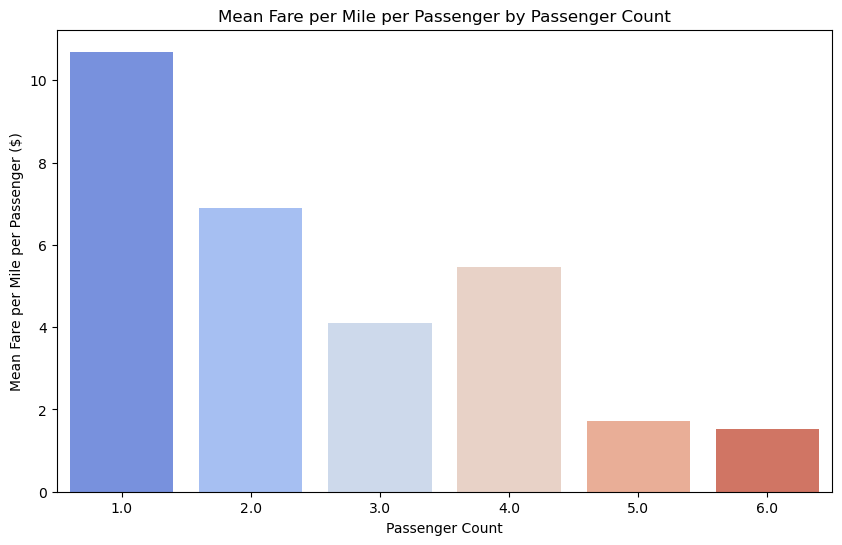

In [77]:
# Compare the average fare per mile for different days and for different times of the day


plt.figure(figsize=(10,6))
sns.barplot(x='passenger_count', y='mean', data=fare_stats, palette='coolwarm')
plt.title('Mean Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Mean Fare per Mile per Passenger ($)')
plt.show()



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

Average fare per mile by day of week:
day_name
Monday       11.344642
Tuesday      11.038033
Wednesday    12.910336
Thursday     11.160589
Friday       11.068032
Saturday     11.020820
Sunday       11.208828
Name: fare_per_mile, dtype: float64

Average fare per mile by hour of day:
pickup_hour
0     12.405134
1      9.535745
2      9.077409
3      8.656834
4     15.352580
5     21.538073
6      7.520502
7      8.506749
8     10.695290
9      9.183821
10     9.945113
11    13.014200
12    10.343705
13    13.901947
14    12.435663
15    12.358919
16    13.454779
17    14.294132
18    11.204505
19    10.912723
20    10.809380
21    10.215496
22    10.307625
23     8.748227
Name: fare_per_mile, dtype: float64


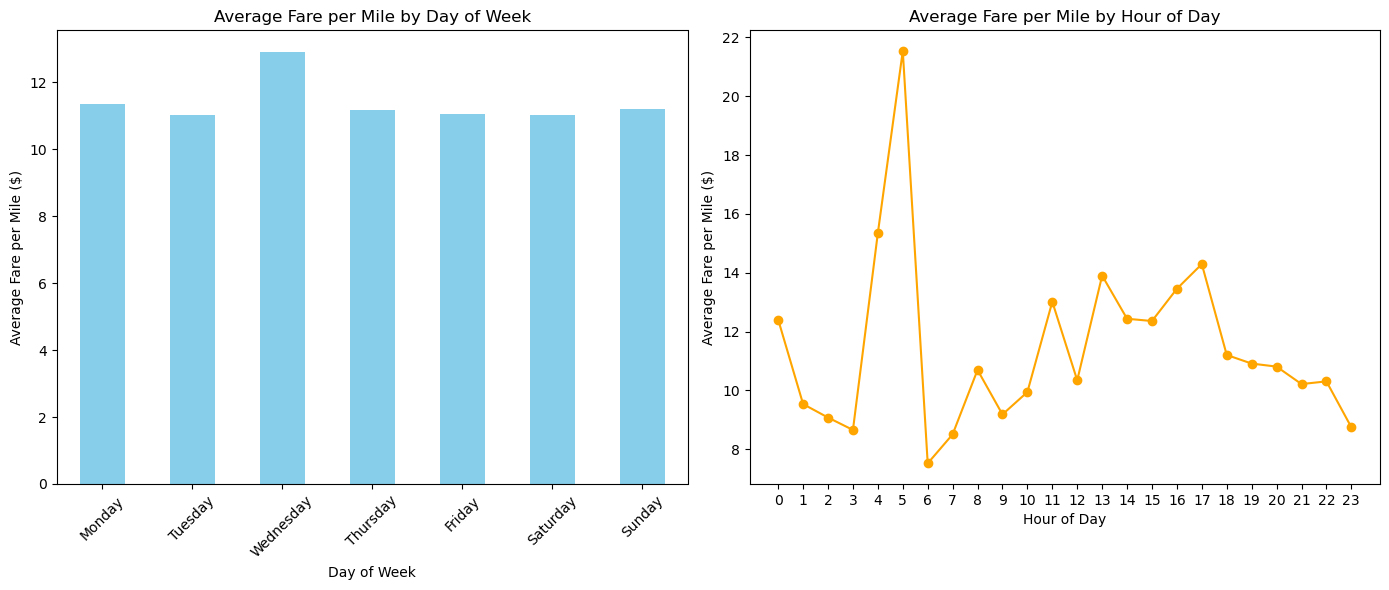

In [79]:

df_filtered = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)].copy()


df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']


df_filtered['pickup_dayofweek'] = df_filtered['tpep_pickup_datetime'].dt.dayofweek
df_filtered['pickup_hour'] = df_filtered['tpep_pickup_datetime'].dt.hour


day_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_filtered['day_name'] = df_filtered['pickup_dayofweek'].map(day_map)


avg_fare_day = df_filtered.groupby('day_name')['fare_per_mile'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

print("Average fare per mile by day of week:")
print(avg_fare_day)

avg_fare_hour = df_filtered.groupby('pickup_hour')['fare_per_mile'].mean()

print("\nAverage fare per mile by hour of day:")
print(avg_fare_hour)



import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
avg_fare_day.plot(kind='bar', color='skyblue')
plt.title('Average Fare per Mile by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
avg_fare_hour.plot(kind='line', marker='o', color='orange')
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(range(0,24))

plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


C:\Users\USER\AppData\Local\Temp\ipykernel_125504\677880706.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_summary = df_valid.groupby(['VendorID', 'distance_bin'])['fare_amount'].agg(['mean', 'count']).reset_index()


    VendorID distance_bin        mean  count
0          1          0-1    7.487825  14452
1          1          1-2   11.394168  23303
2          1          2-5   18.577951  19007
3          1         5-10   33.940850   5544
4          1        10-20   60.564209   4585
5          1        20-50   84.220355    619
6          1          50+  243.325000      4
7          2          0-1    8.091398  41416
8          2          1-2   11.786236  65017
9          2          2-5   19.210242  53604
10         2         5-10   34.864986  16843
11         2        10-20   62.375812  15676
12         2        20-50   87.984367   2331
13         2          50+  282.485385     26


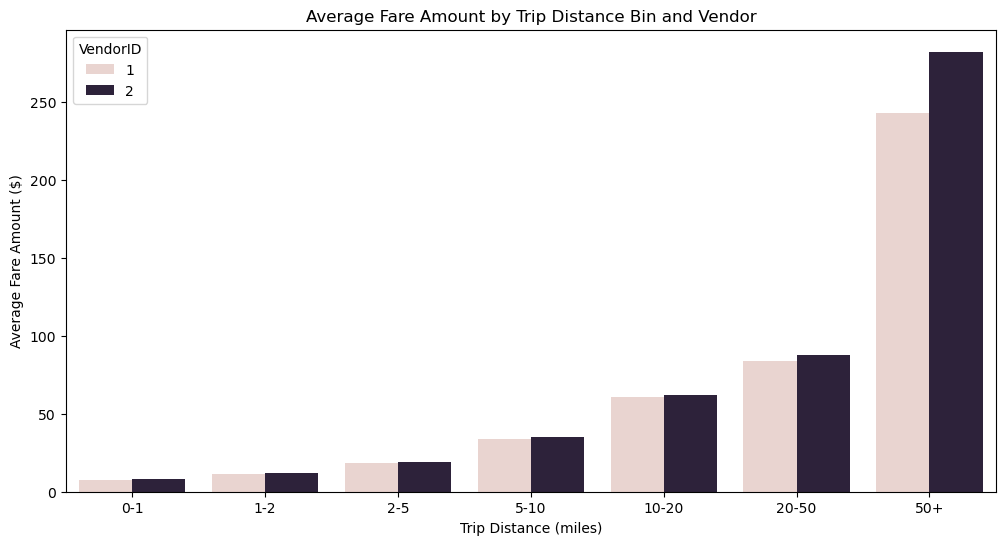

In [ ]:
# Defining distance tiers


df_valid = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)].copy()


bins = [0, 1, 2, 5, 10, 20, 50, 100]  
labels = ['0-1', '1-2', '2-5', '5-10', '10-20', '20-50', '50+']


df_valid['distance_bin'] = pd.cut(df_valid['trip_distance'], bins=bins, labels=labels, right=False)


fare_summary = df_valid.groupby(['VendorID', 'distance_bin'])['fare_amount'].agg(['mean', 'count']).reset_index()

print(fare_summary)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=fare_summary, x='distance_bin', y='mean', hue='VendorID')
plt.title('Average Fare Amount by Trip Distance Bin and Vendor')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Average Fare Amount ($)')
plt.legend(title='VendorID')
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [83]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df['tip_pct'] = (df['tip_amount'] / df['fare_amount']) * 100

df = df[df['fare_amount'] > 0]


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

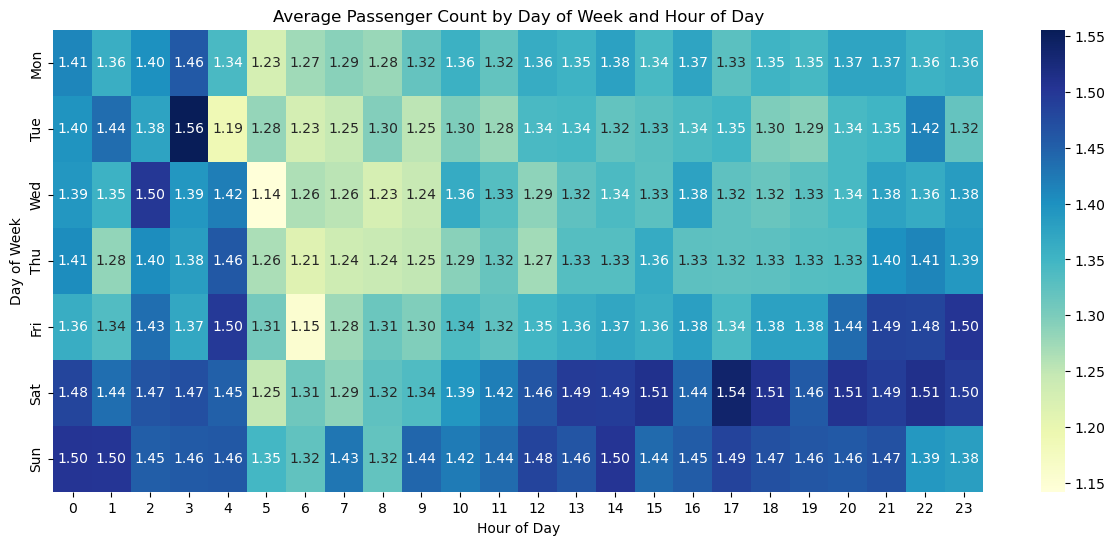

In [81]:




df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek  


passenger_summary = df.groupby(['pickup_dayofweek', 'pickup_hour'])['passenger_count'].mean().reset_index()


pivot_table = passenger_summary.pivot(index='pickup_dayofweek', columns='pickup_hour', values='passenger_count')


day_names = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
pivot_table.index = pivot_table.index.map(day_names)


plt.figure(figsize=(15,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average Passenger Count by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [84]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.


avg_passenger_by_zone = df_merged.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

ame
zones = zones.merge(avg_passenger_by_zone, how='left', left_on='LocationID', right_on='PULocationID')

zones['avg_passenger_count'] = zones['avg_passenger_count'].fillna(0)  # Optional: fill NaNs with 0


NameError: name 'ame' is not defined

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [82]:
# How often is each surcharge applied?

surcharge_cols = ['airport_fee_comb', 'congestion_surcharge', 'tolls_amount', 'extra']


surcharge_counts = {}

for col in surcharge_cols:
    surcharge_counts[col] = (df[col] > 0).sum()

surcharge_counts_df = pd.DataFrame.from_dict(surcharge_counts, orient='index', columns=['Count of Trips with Surcharge'])
surcharge_counts_df['Proportion'] = surcharge_counts_df['Count of Trips with Surcharge'] / len(df)

print(surcharge_counts_df)


KeyError: 'airport_fee_comb'

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.